# ISIDORA data check

In [ ]:
# %load /Users/Gonzalo/github/IC/Config/ISIDORA_default.csv
# Configuration file for ISIDORA
# The parameters for ISIDORA are:
#
#        PATH_IN = path to DST file
#        FILE_IN = name of DST file
#        FIRST_EVT,LAST_EVT,RUN_ALL,
#
#        RUN_ALL is used to decide whether to run all the events in the file
#        in case that the total number of events requested (LAST_EVT-FIRST_EVT)
#        exceeds the number of events in the DST file. If RUN_ALL is set to 1 (True),
#        the script will run over all elements in the DST,
#        otherwise it will exit with a warning.
#
#		 COEF decides whether to use CA (COEF = 0) or AC (COEF =1)
#
#        CA = Nominal (measured) values of the capacitors defining the filter
#        AC = nominal (measured) values of the accumulator
#        MAU_LEN = length of MAU
#        NSIGMA1 number of sigmas for thr1
#        NSIGMA2 number of sigmas for thr2
#        NSIGMA3 number of sigmas for thr3
#
#
PATH_IN,FILE_IN,FIRST_EVT,LAST_EVT,RUN_ALL,COEF,CA,AC,MAU_LEN,NSIGMA1,NSIGMA2,NSIGMA3,END
#
/Users/Gonzalo/github/IC/data/,DIOMIRA0.h5,0,10,0,0,6.02975448 6.22547194 6.0671337 6.22159457 6.29999787 6.09892384 6.18289435 6.21775591 6.19306671 6.30518792 6.20359891 6.312311921,0.0017643 0.00170883 0.00175343 0.0017099 0.00168862 0.00174429 0.0017206 0.00171095 0.00171778 0.00168723 0.00171486 0.00168533,250,5.0,0.0,2.0,1


It is assumed that ISIDORA has already been run with the above configuration.

In [2]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))


/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 15/10/2016 at 22:24:03.


In [5]:
%ls /Users/Gonzalo/github/IC/data/

DIOMIRA0.h5@            DIOMIRA0_bkup_float.h5  out0.h5
DIOMIRA0_bkup.h5        in0.h5                  out0_bkup.h5


In [7]:
# open file and check its contents
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/DIOMIRA0_bkup.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/DIOMIRA0_bkup.h5 (File) ''
Last modif.: 'Sat Oct 15 21:21:58 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/acum (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/baseline (EArray(100, 12), shuffle, zlib(1)) ''
/BLR/mau (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(100, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtcwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(1420,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(1

In [8]:
pmttwf  = h5f.root.TWF.PMT
sipmtwf = h5f.root.TWF.SiPM
pmtblr  = h5f.root.RD.pmtblr
pmtcwf  = h5f.root.RD.pmtcwf
pmtrwf  = h5f.root.RD.pmtrwf
sipmrwf = h5f.root.RD.sipmrwf
pmtdf   = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf  = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

## Check PMT CWF

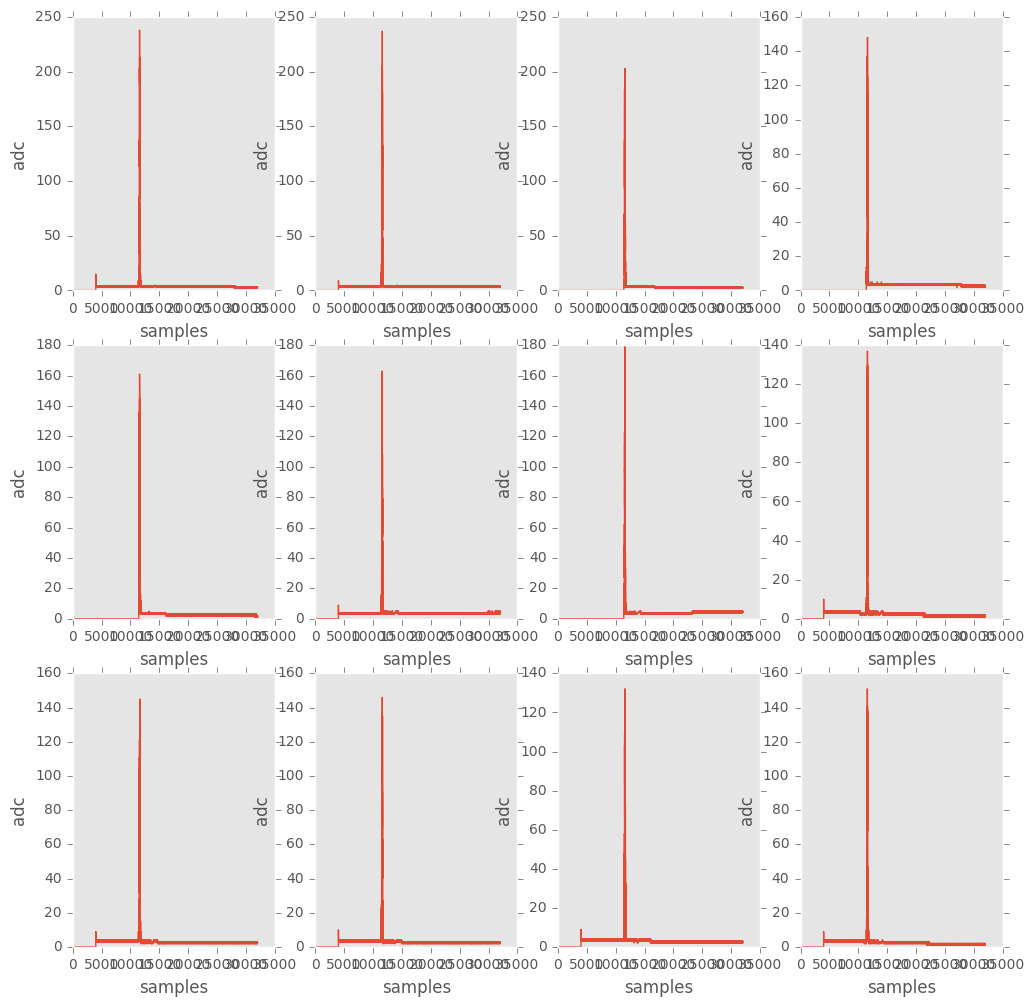

In [26]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])))

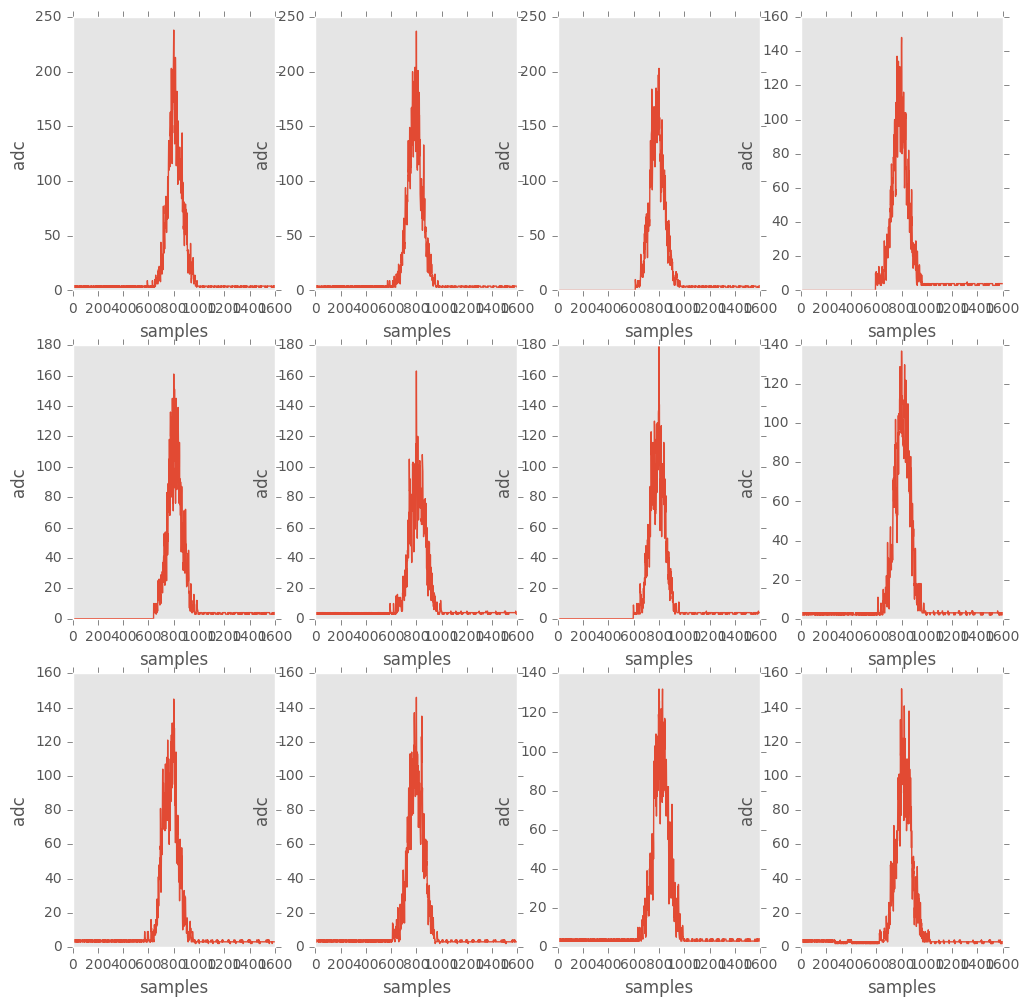

In [27]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])),zoom=True)

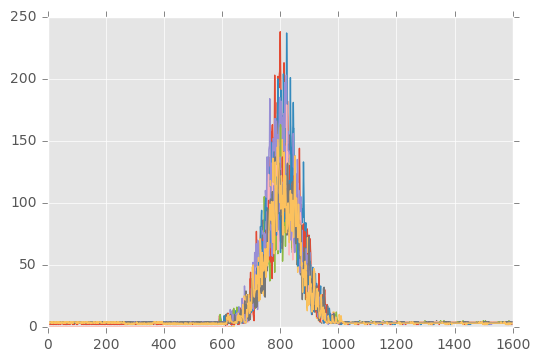

In [28]:
mpl.overlap_waveforms(pmtcwf,0)

## Compare CWF with BLR

RED  = CWF

BLUE = BLR

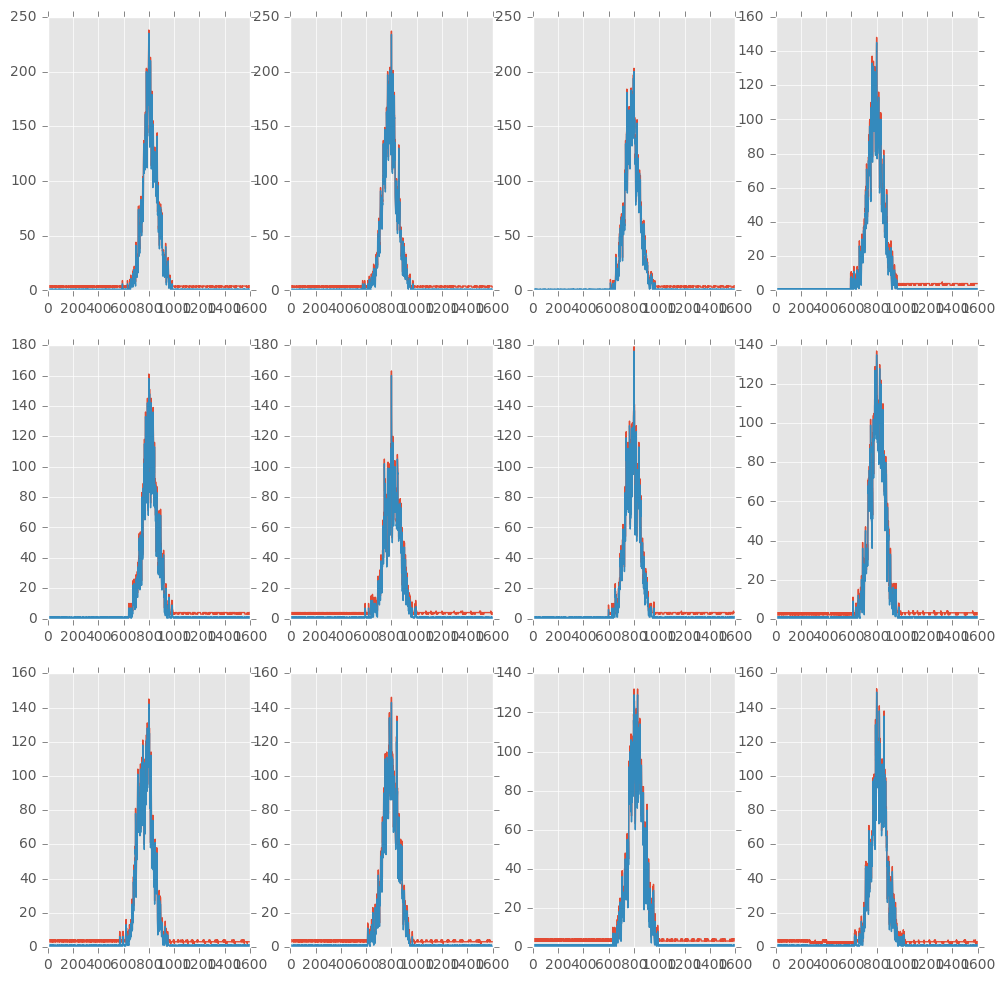

In [29]:
mpl.compare_corr_raw(pmtcwf,pmtblr,0)

## Compare CWF with RWF

RED  = CWF

BLUE = RWF

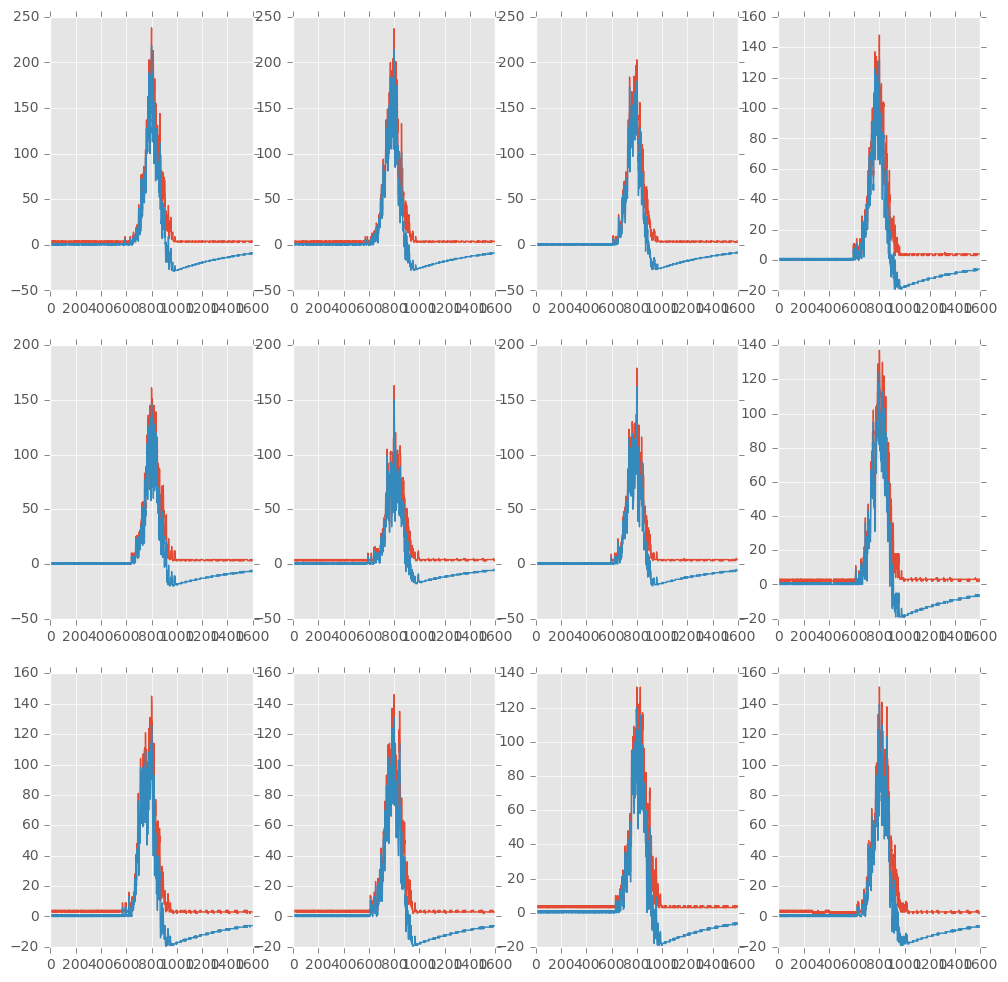

In [30]:
mpl.compare_corr_raw(pmtcwf,pmtrwf,0)